# Figures B4 and B5: descriptive plots on moderators

In [1]:
source('../scripts/load_libraries.R')
source('../scripts/load_constants.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘lemon’


The following objects are masked from ‘package:ggplot2’:

    CoordCartesian, element_render




In [29]:
df %>% nrow
df_clean %>% nrow
17264341 - 12623814
(17264341 - 12623814) / 17264341
df %>% summarise(n_distinct(user_id))
df_clean %>% summarise(n_distinct(user_id))
6660 - 6415

[1] 17264341

[1] 12623814

[1] 4640527

[1] 0.2687926

n_distinct(user_id)
<int>
6660


n_distinct(user_id)
<int>
6415


[1] 245

In [31]:
1- df %>% summarise(mean(identified))

mean(identified)
<dbl>
0.04936597


In [2]:
source('../scripts/load_data.R')

Rows: 17264341 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): comment_id, user_id, author_id, anonymous, first_view

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1281001 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): comment_id, user_id, score, time_stamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223737 Columns: 4
── Column specification ────────────────────────────────

In [3]:
source('../scripts/load_moderator_variables.R')

Using the_lag=3

`summarise()` has grouped output by 'author_id'. You can override using the `.groups` argument.
Joining, by = c("author_id", "ds")
Joining, by = c("author_id", "ds")
Joining, by = c("user_id", "author_id", "ds")


In [4]:
covariates <- c('Production', 'Reputation', 'Reciprocity')
long_format <- df_with_covariates %>%
  sample_n(1000000) %>%
  select(identified, Reputation = reputation, Production = production, Reciprocity = reciprocity) %>%
  gather(covariate, value, Reputation, Production, Reciprocity) %>%
  mutate(covariate = factor(covariate, levels = covariates)) %>%
  filter(!is.na(value)) %>%
  mutate(condition = factor(1-identified, labels = condition.levels))

long_format %>% head()

identified,covariate,value,condition
<dbl>,<fct>,<dbl>,<fct>
1,Reputation,4.0000000,Identified
1,Reputation,0.6666667,Identified
1,Reputation,0.6375000,Identified
1,Reputation,1.5714286,Identified
1,Reputation,7.6000000,Identified
0,Reputation,1.6966292,Anonymous


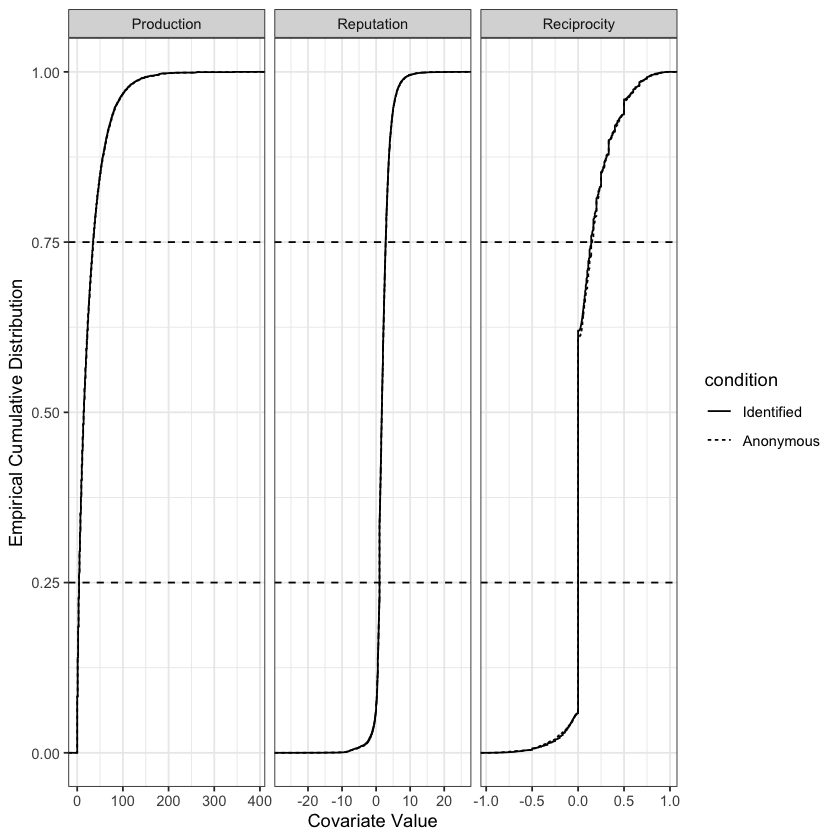

In [5]:
p <- long_format %>%
  ggplot(aes(x = value, linetype = condition)) +
  stat_ecdf(geom = 'step') +
  geom_hline(yintercept = c(0.25, 0.75), linetype = 'dashed') +
  facet_grid(. ~ covariate, scales = 'free_x') +
  theme_bw() +
  xlab('Covariate Value') +
  ylab('Empirical Cumulative Distribution')
p

`geom_smooth()` using formula 'y ~ x'



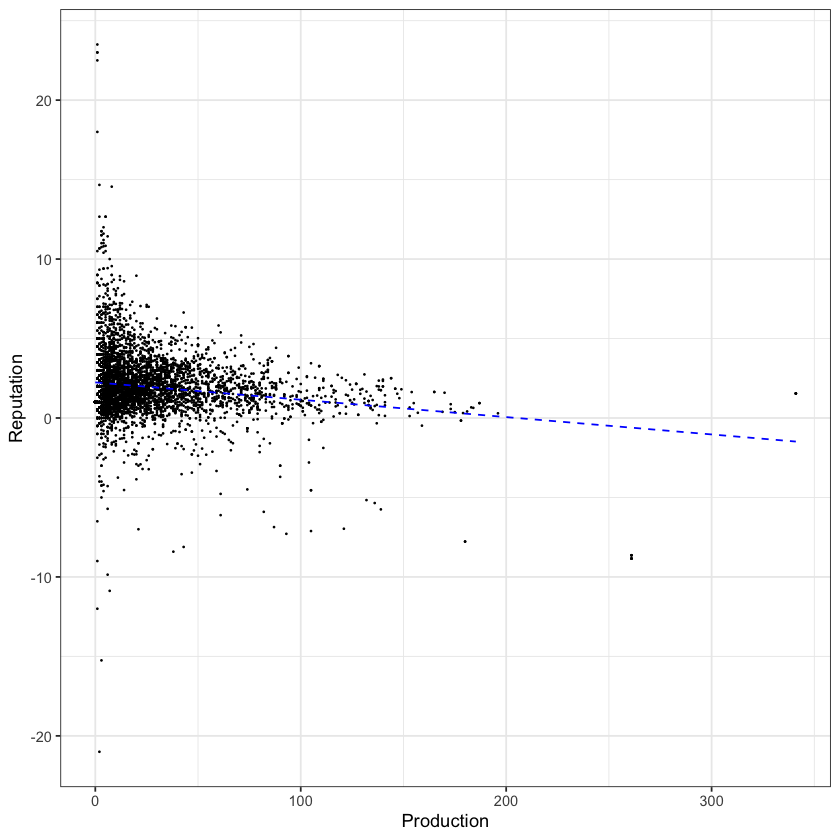

In [19]:
p1 <- df_with_covariates %>%
  filter(!is.na(reputation), !is.na(production)) %>%
  sample_n(5000) %>%
  ggplot(aes(x = production, y = reputation)) +
  geom_point(size = .1) +
  geom_smooth(method = 'lm', se = FALSE, colour = 'blue', size = 0.5, linetype = 'dashed') +
  theme_bw() +
  xlab('Production') +
  ylab('Reputation')
p1

In [5]:
df_with_covariates %>%
  filter(!is.na(reputation), !is.na(production)) %>%
  summarise(cor(reputation, production))

"cor(reputation, production)"
<dbl>
-0.1609817


`geom_smooth()` using formula 'y ~ x'



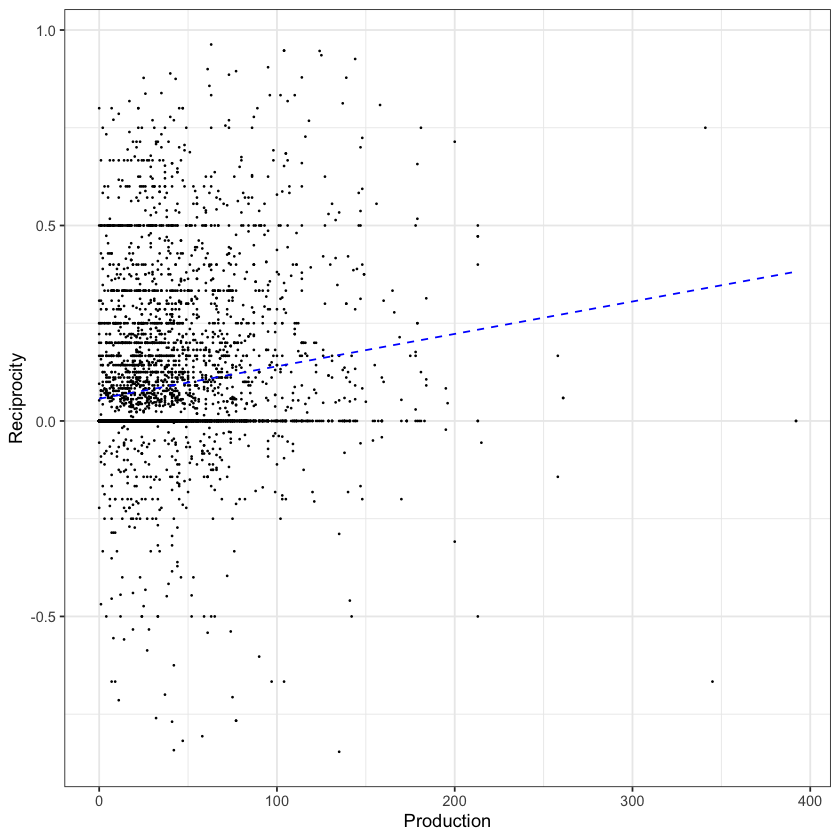

In [20]:
p2 <- df_with_covariates %>%
  filter(!is.na(reciprocity), !is.na(production)) %>%
  sample_n(5000) %>%
  ggplot(aes(x = production, y = reciprocity)) +
  geom_point(size = .1) +
  geom_smooth(method = 'lm', se = FALSE, colour = 'blue', size = 0.5, linetype = 'dashed') +
  theme_bw() +
  xlab('Production') +
  ylab('Reciprocity')
p2

In [7]:
df_with_covariates %>%
  filter(!is.na(reciprocity), !is.na(production)) %>%
  summarise(cor(reciprocity, production))

"cor(reciprocity, production)"
<dbl>
0.1551137


`geom_smooth()` using formula 'y ~ x'



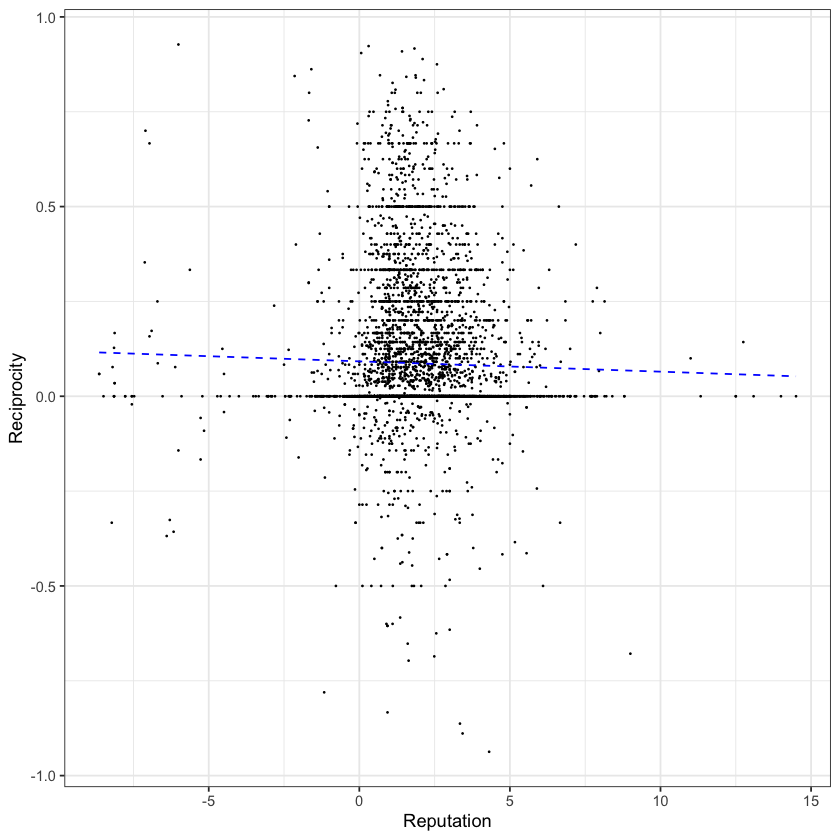

In [21]:
p3 <- df_with_covariates %>%
  filter(!is.na(reciprocity), !is.na(reputation)) %>%
  sample_n(5000) %>%
  ggplot(aes(x = reputation, y = reciprocity)) +
  geom_point(size = .1) +
  geom_smooth(method = 'lm', se = FALSE, colour = 'blue', size = 0.5, linetype = 'dashed') +
  theme_bw() +
  xlab('Reputation') +
  ylab('Reciprocity')
p3

In [9]:
df_with_covariates %>%
  filter(!is.na(reciprocity), !is.na(reputation)) %>%
  summarise(cor(reciprocity, reputation))

"cor(reciprocity, reputation)"
<dbl>
-0.000729201


In [22]:
#ggsave('../figures/fig-b4.pdf', p, width = 5.5, height = 3.5)
ggsave('../figures/fig-b5a.pdf', p1, width = 3.5, height = 3)
ggsave('../figures/fig-b5b.pdf', p2, width = 3.5, height = 3)
ggsave('../figures/fig-b5c.pdf', p3, width = 3.5, height = 3)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

